In [1]:
import pandas as pd
import numpy as np
%pylab inline
plt.style.use('seaborn-dark')
import warnings
warnings.filterwarnings("ignore") # отключение варнингов
pd.set_option('display.max_columns', None) # pd.options.display.max_columns = None 
# pd.set_option('display.max_rows', None) # не прятать столбцы при выводе дата-фреймов
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', size=14)

from mlxtend.plotting import plot_decision_regions

Populating the interactive namespace from numpy and matplotlib


# Линейная регрессия

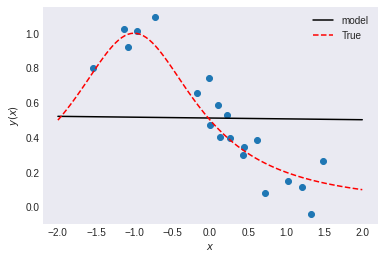

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

np.random.seed(10)

X = np.random.randn(20, 1)
y = 1/((X+1)**2 + 1) + 0.1*np.random.randn(20, 1)

XX = np.linspace(-2, 2, 101)
yy = 1/((XX+1)**2 + 1)

model = Ridge(1000)
model.fit(X, y)
X2 = XX[:, np.newaxis]
a = model.predict(X2)
plt.scatter(X[:,0], y)
plt.plot(XX, a, c='k', label='model')
plt.plot(XX, yy, '--', c='red', label='True')
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.legend()

# Подсказка

ответы на вопросы с помощью экспериментов

In [22]:
from sklearn.linear_model import Ridge

x = np.random.rand(10)
X = np.stack([x, 2*x], axis=0).T
y = x **2

model = Ridge(1)
model.fit(X, y)
model.coef_

array([0.17116123, 0.34232246])

# Логистическая регрессия

,0,1
0,1.162435,-0.061176
1,0.945128,-0.043227
2,1.078331,-0.102277
3,1.156040,0.115038
4,0.999199,0.228718


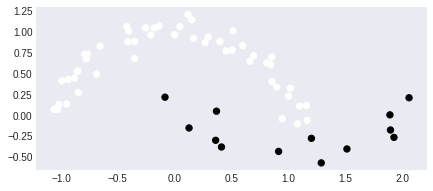

In [24]:
from sklearn.datasets import make_moons

n_samples=100

X, y = make_moons(n_samples=n_samples, shuffle=False, noise=0.1, random_state=1)

# прореживаем, чтобы был дисбаланс
i = (y==0) | (np.random.rand(n_samples) > 0.75)
X = X[i, :]
y = y[i]

plt.figure(figsize=(7, 3))
plt.scatter(X[:,0], X[:,1], 40, y)
pd.DataFrame(X[:5,:])

In [25]:
X.shape

(63, 2)

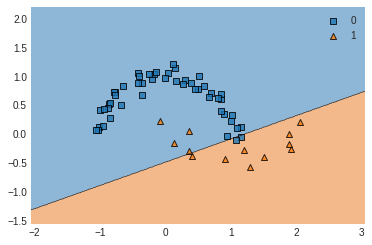

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1.001)
logreg.fit(X, y)
plot_decision_regions(X, y, logreg)

In [ ]:
sklearn.linear_mode.LogisticRegression

# Валидация

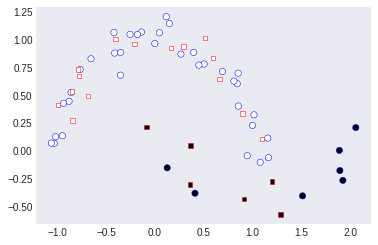

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=43,
                                                    shuffle=True)
plt.scatter(X_train[:,0], X_train[:,1], 40, y_train, lw=0.5, edgecolor='b')
plt.scatter(X_test[:,0], X_test[:,1], 20, y_test, marker='s', lw=0.5, edgecolor='r')

In [13]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=4, test_size=0.3, random_state=1)

for i, (train_index, test_index) in enumerate(ss.split(np.arange(10))):
    print (i, train_index, test_index)

0 [4 0 3 1 7 8 5] [2 9 6]
1 [0 8 4 2 1 6 7] [9 5 3]
2 [9 0 6 1 7 4 2] [8 3 5]
3 [0 6 1 5 8 7 9] [2 4 3]


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=4, test_size=0.3, random_state=1)

for i, (train_index, test_index) in enumerate(ss.split(np.arange(10),
                                             [1,1,1,1,0,0,0,0,0,0])):
    print (i, train_index, test_index)

0 [8 4 0 2 5 3 6] [7 9 1]
1 [9 3 4 7 5 2 1] [6 8 0]
2 [8 7 0 3 6 4 2] [5 9 1]
3 [0 2 9 5 3 6 8] [7 1 4]


In [15]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=10)

for i, (train_index, test_index) in enumerate(gss.split(np.arange(10),
                                                       groups=[1,1,1,2,2,2,3,3,4,4])):
    print (i, train_index, test_index)
    # if i > 10:
    #     print ('...')
    #     break

0 [0 1 2 3 4 5 6 7] [8 9]
1 [0 1 2 6 7 8 9] [3 4 5]
2 [0 1 2 3 4 5 8 9] [6 7]
3 [0 1 2 3 4 5 6 7] [8 9]
4 [3 4 5 6 7 8 9] [0 1 2]
5 [0 1 2 6 7 8 9] [3 4 5]
6 [0 1 2 6 7 8 9] [3 4 5]
7 [0 1 2 3 4 5 8 9] [6 7]
8 [0 1 2 6 7 8 9] [3 4 5]
9 [0 1 2 3 4 5 6 7] [8 9]


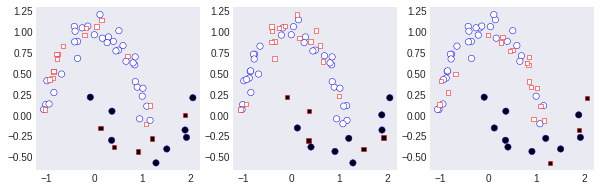

In [33]:
from sklearn.model_selection import KFold

n_splits=3

kf = KFold(n_splits=n_splits, random_state=1, shuffle=True)

plt.figure(figsize=(10, 3))
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    plt.subplot(1, n_splits, i+1)
    plt.scatter(X_train[:,0], X_train[:,1], 40, y_train, lw=0.5, edgecolor='b')
    plt.scatter(X_test[:,0], X_test[:,1], 20, y_test, marker='s', lw=0.5, edgecolor='r')

In [17]:
for i, (train_index, test_index) in enumerate(kf.split(np.arange(10))):
    print (i, train_index, test_index)

0 [0 1 3 5 7 8] [2 4 6 9]
1 [2 4 5 6 7 8 9] [0 1 3]
2 [0 1 2 3 4 6 9] [5 7 8]


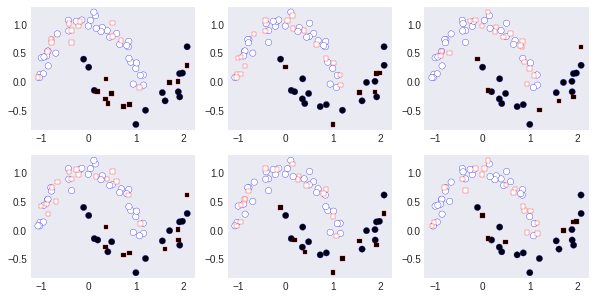

In [18]:
from sklearn.model_selection import RepeatedKFold

n_splits = 3
n_repeats = 2

kf = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=1)

plt.figure(figsize=(10, 5))
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    plt.subplot(n_repeats, n_splits, i+1)
    plt.scatter(X_train[:,0], X_train[:,1], 40, y_train, lw=0.3, edgecolor='b')
    plt.scatter(X_test[:,0], X_test[:,1], 20, y_test, marker='s', lw=0.3, edgecolor='r')

In [19]:
for i, (train_index, test_index) in enumerate(kf.split(np.arange(10))):
    print (i, train_index, test_index)

0 [0 1 3 5 7 8] [2 4 6 9]
1 [2 4 5 6 7 8 9] [0 1 3]
2 [0 1 2 3 4 6 9] [5 7 8]
3 [1 2 4 6 7 8] [0 3 5 9]
4 [0 1 3 5 6 7 9] [2 4 8]
5 [0 2 3 4 5 8 9] [1 6 7]


In [34]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

for i, (train_index, test_index) in enumerate(loo.split(np.arange(10))):
    print (i, train_index, test_index)

0 [1 2 3 4 5 6 7 8 9] [0]
1 [0 2 3 4 5 6 7 8 9] [1]
2 [0 1 3 4 5 6 7 8 9] [2]
3 [0 1 2 4 5 6 7 8 9] [3]
4 [0 1 2 3 5 6 7 8 9] [4]
5 [0 1 2 3 4 6 7 8 9] [5]
6 [0 1 2 3 4 5 7 8 9] [6]
7 [0 1 2 3 4 5 6 8 9] [7]
8 [0 1 2 3 4 5 6 7 9] [8]
9 [0 1 2 3 4 5 6 7 8] [9]


In [21]:
from sklearn.model_selection import LeavePOut

loo = LeavePOut(2)

for i, (train_index, test_index) in enumerate(loo.split(np.arange(10))):
    print (i, train_index, test_index)
    if i > 10:
        print ('...')
        break

0 [2 3 4 5 6 7 8 9] [0 1]
1 [1 3 4 5 6 7 8 9] [0 2]
2 [1 2 4 5 6 7 8 9] [0 3]
3 [1 2 3 5 6 7 8 9] [0 4]
4 [1 2 3 4 6 7 8 9] [0 5]
5 [1 2 3 4 5 7 8 9] [0 6]
6 [1 2 3 4 5 6 8 9] [0 7]
7 [1 2 3 4 5 6 7 9] [0 8]
8 [1 2 3 4 5 6 7 8] [0 9]
9 [0 3 4 5 6 7 8 9] [1 2]
10 [0 2 4 5 6 7 8 9] [1 3]
11 [0 2 3 5 6 7 8 9] [1 4]
...


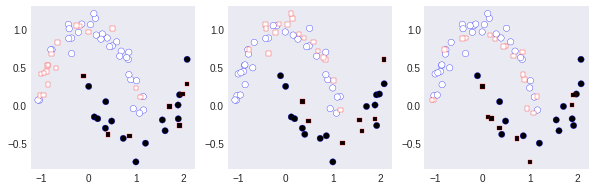

In [22]:
from sklearn.model_selection import StratifiedKFold

n_splits=3

skf = StratifiedKFold(n_splits=n_splits, random_state=1, shuffle=True)

plt.figure(figsize=(10, 3))
for i, (train_index, test_index) in enumerate(skf.split(X, y)): # + y!!!
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    plt.subplot(1, n_splits, i+1)
    plt.scatter(X_train[:,0], X_train[:,1], 40, y_train, lw=0.3, edgecolor='b')
    plt.scatter(X_test[:,0], X_test[:,1], 20, y_test, marker='s', lw=0.3, edgecolor='r') 

In [23]:
skf = StratifiedKFold(n_splits=4, random_state=1, shuffle=False)

for i, (train_index, test_index) in enumerate(skf.split(np.arange(10),
                                                       [1,1,1,0,0,0,0,0,0,0])):
    print (i, train_index, test_index)
    # if i > 10:
    #     print ('...')
    #     break

0 [1 2 5 6 7 8 9] [0 3 4]
1 [0 2 3 4 7 8 9] [1 5 6]
2 [0 1 3 4 5 6 8 9] [2 7]
3 [0 1 2 3 4 5 6 7] [8 9]


In [24]:
from sklearn.model_selection import TimeSeriesSplit



tscv = TimeSeriesSplit(n_splits=3) # + появился gap


for i, (train_index, test_index) in enumerate(tscv.split(np.arange(10))):
    print (i, train_index, test_index)
    # if i > 10:
    #     print ('...')
    #     break

0 [0 1 2 3] [4 5]
1 [0 1 2 3 4 5] [6 7]
2 [0 1 2 3 4 5 6 7] [8 9]


# Оценка алгоритмов

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
cv = StratifiedShuffleSplit(n_splits=10,
                  test_size=0.25,
                  random_state=1)
scores = cross_val_score(logreg, X, y, cv=cv, scoring='accuracy')
print (f'accuracy = {scores.mean().round(3)} \u00B1 {scores.std().round(3)}')

accuracy = 0.894 ± 0.063


In [37]:
scores

array([0.8125, 0.875 , 0.9375, 0.875 , 0.9375, 0.9375, 1.    , 0.9375,
       0.8125, 0.8125])

Text(0, 0.5, 'accuracy')

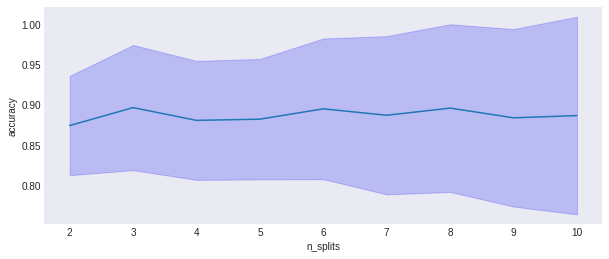

In [39]:
from sklearn.model_selection import RepeatedKFold

accs = []
stds = []
pars = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in pars:
    cv = RepeatedKFold(n_splits=k, n_repeats=10) # KFold(n_splits=k, shuffle=True, random_state=1)
    scores = cross_val_score(logreg, X, y, cv=cv, scoring='accuracy')
    accs.append(scores.mean())
    stds.append(scores.std())
    
accs = np.array(accs)    
stds = np.array(stds)
    
plt.figure(figsize=(10, 4))    
plt.fill_between(pars, accs - stds, accs + stds, color='b', alpha=0.2)
plt.plot(pars, accs)
plt.xlabel('n_splits')
plt.ylabel('accuracy')

In [41]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression()
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)

param_range = [0.01, 0.1, 1.0, 10, 100]
train_scores, test_scores = validation_curve(estimator=model, X=X, y=y,
                                             param_name='C',
                                             param_range=param_range,
                                             cv=cv, scoring='accuracy')
train_scores_means = train_scores.mean(axis=1)
train_scores_stds = train_scores.std(axis=1)
test_scores_means = test_scores.mean(axis=1)
test_scores_stds = test_scores.std(axis=1)

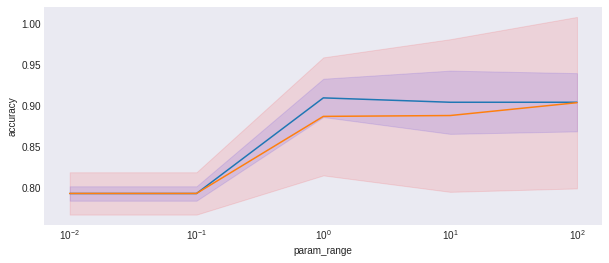

In [42]:
plt.figure(figsize=(10, 4))    
plt.fill_between(param_range,
                train_scores_means - train_scores_stds,
                 train_scores_means + train_scores_stds,
                 color='b', alpha=0.1)
plt.plot(param_range, train_scores_means)
plt.fill_between(param_range,
                test_scores_means - test_scores_stds,
                 test_scores_means + test_scores_stds,
                 color='r', alpha=0.1)
plt.plot(param_range, test_scores_means)
plt.xlabel('param_range')
plt.ylabel('accuracy')
plt.xscale('log')

# cross_val_predict

In [43]:
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC

logreg = LogisticRegression(C=100)
svm = SVC(C=1.0, kernel='rbf', probability=True)

In [44]:
cv = KFold(n_splits=4, shuffle=True, random_state=1)

a_logreg = cross_val_predict(estimator=logreg, X=X, y=y,
                       cv = cv, method='predict_proba')

a_svm = cross_val_predict(estimator=svm, X=X, y=y,
                       cv = cv, method='predict_proba')

Text(0, 0.5, 'svm')

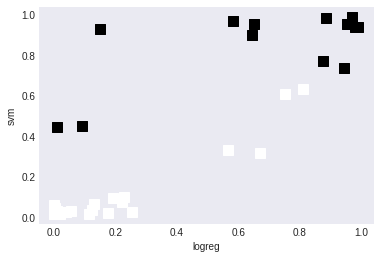

In [50]:
plt.scatter(a_logreg[:,1], a_svm[:,1], 100, y, 's')
plt.xlabel('logreg')
plt.ylabel('svm')

In [46]:
a_logreg

array([[1.89003982e-01, 8.10996018e-01],
       [2.48203923e-01, 7.51796077e-01],
       [3.28783408e-01, 6.71216592e-01],
       [7.78651587e-01, 2.21348413e-01],
       [8.87374567e-01, 1.12625433e-01],
       [4.32824360e-01, 5.67175640e-01],
       [8.07518775e-01, 1.92481225e-01],
       [7.72413077e-01, 2.27586923e-01],
       [8.70982166e-01, 1.29017834e-01],
       [9.62219394e-01, 3.77806057e-02],
       [9.99212304e-01, 7.87695810e-04],
       [9.79109838e-01, 2.08901619e-02],
       [9.68545083e-01, 3.14549173e-02],
       [9.96087630e-01, 3.91236982e-03],
       [9.99167558e-01, 8.32441710e-04],
       [9.91461727e-01, 8.53827308e-03],
       [9.91393052e-01, 8.60694788e-03],
       [9.99896016e-01, 1.03984364e-04],
       [9.99658224e-01, 3.41776080e-04],
       [9.99954406e-01, 4.55938872e-05],
       [9.99406548e-01, 5.93452180e-04],
       [9.99694773e-01, 3.05226944e-04],
       [9.99623186e-01, 3.76814362e-04],
       [9.99962814e-01, 3.71856390e-05],
       [9.995148

# Learning Curve

Text(0, 0.5, 'accuracy')

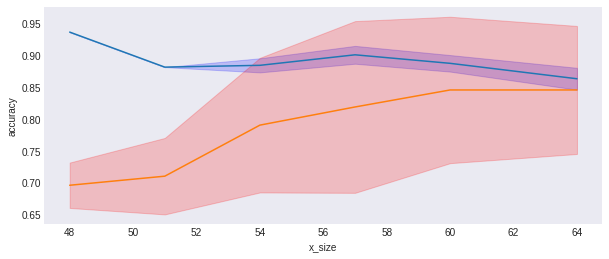

In [48]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import StratifiedKFold

model = LogisticRegression()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

train_sizes = np.linspace(0,1,21)[1:]

train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                        X=X,
                                                        y=y,
                                                        cv=cv,
                                                        train_sizes=train_sizes,
                                                        scoring='accuracy')

train_scores_means = train_scores.mean(axis=1)
train_scores_stds = train_scores.std(axis=1)
test_scores_means = test_scores.mean(axis=1)
test_scores_stds = test_scores.std(axis=1)

plt.figure(figsize=(10, 4))    
plt.fill_between(train_sizes,
                train_scores_means - train_scores_stds,
                 train_scores_means + train_scores_stds,
                 color='b', alpha=0.2)
plt.plot(train_sizes, train_scores_means)
plt.fill_between(train_sizes,
                test_scores_means - test_scores_stds,
                 test_scores_means + test_scores_stds,
                 color='r', alpha=0.2)
plt.plot(train_sizes, test_scores_means)
plt.xlabel('x_size')
plt.ylabel('accuracy')

# Grid Search

In [51]:
svm = SVC(C=1.0, kernel='rbf', probability=False)

In [52]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':(1, 10, 100),
              'kernel':('rbf', 'poly', 'sigmoid'),
              'degree':(1,2,3),
              'gamma':(0.1,1,1.0)} # , scoring='roc_auc'
clf = GridSearchCV(svm, parameters, cv=cv, )
clf.fit(X, y)
clf.cv_results_['mean_test_score']

array([0.86071429, 0.84821429, 0.84821429, 0.97321429, 0.87678571,
       0.80714286, 0.97321429, 0.87678571, 0.80714286, 0.86071429,
       0.69642857, 0.84821429, 0.97321429, 0.83392857, 0.80714286,
       0.97321429, 0.83392857, 0.80714286, 0.86071429, 0.69642857,
       0.84821429, 0.97321429, 0.80535714, 0.80714286, 0.97321429,
       0.80535714, 0.80714286, 0.875     , 0.87678571, 0.87678571,
       1.        , 0.87678571, 0.69642857, 1.        , 0.87678571,
       0.69642857, 0.875     , 0.83392857, 0.87678571, 1.        ,
       0.81964286, 0.69642857, 1.        , 0.81964286, 0.69642857,
       0.875     , 0.83392857, 0.87678571, 1.        , 0.83214286,
       0.69642857, 1.        , 0.83214286, 0.69642857, 0.93035714,
       0.87678571, 0.77857143, 1.        , 0.86428571, 0.65357143,
       1.        , 0.86428571, 0.65357143, 0.93035714, 0.83392857,
       0.77857143, 1.        , 0.81964286, 0.65357143, 1.        ,
       0.81964286, 0.65357143, 0.93035714, 0.84821429, 0.77857

In [53]:
import pandas as pd
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000674,0.000186,0.001519,0.002920,1,1,0.1,rbf,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ...",0.875,0.875,1.000000,1.000000,1.000000,0.714286,0.857143,0.714286,0.714286,0.857143,0.860714,0.110887,36
1,0.000419,0.000016,0.000296,0.000013,1,1,0.1,poly,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ...",0.750,0.875,1.000000,1.000000,1.000000,0.714286,0.857143,0.714286,0.714286,0.857143,0.848214,0.115521,41
2,0.000467,0.000025,0.000323,0.000049,1,1,0.1,sigmoid,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ...",0.750,0.875,1.000000,1.000000,1.000000,0.571429,0.857143,0.714286,0.714286,1.000000,0.848214,0.146657,41
3,0.000460,0.000047,0.000304,0.000015,1,1,1,rbf,"{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'r...",1.000,0.875,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.857143,1.000000,0.973214,0.053720,13
4,0.000412,0.000015,0.000282,0.000010,1,1,1,poly,"{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'p...",0.750,0.875,0.857143,1.000000,1.000000,0.857143,0.857143,0.714286,0.857143,1.000000,0.876786,0.094643,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.002626,0.001102,0.000307,0.000024,100,3,1,poly,"{'C': 100, 'degree': 3, 'gamma': 1, 'kernel': ...",1.000,0.875,0.857143,0.857143,1.000000,0.714286,0.714286,1.000000,0.714286,0.857143,0.858929,0.110786,39
77,0.000437,0.000015,0.000285,0.000011,100,3,1,sigmoid,"{'C': 100, 'degree': 3, 'gamma': 1, 'kernel': ...",0.625,0.625,0.714286,0.857143,0.714286,0.571429,0.571429,0.428571,0.857143,0.571429,0.653571,0.127576,76
78,0.000430,0.000060,0.000284,0.000011,100,3,1,rbf,"{'C': 100, 'degree': 3, 'gamma': 1.0, 'kernel'...",1.000,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
79,0.002747,0.001185,0.000311,0.000013,100,3,1,poly,"{'C': 100, 'degree': 3, 'gamma': 1.0, 'kernel'...",1.000,0.875,0.857143,0.857143,1.000000,0.714286,0.714286,1.000000,0.714286,0.857143,0.858929,0.110786,39
